In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
#from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/processed/bank-dataset-processed-skewness.csv",index_col=0)

In [3]:
df.head()

,default,housing,loan,y,duration_boxcox,campaign_cbrt,pdays_special,pdays_transformed,had_previous,age_scaled,...,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,month_num,month_sin,month_cos
0,False,True,False,False,8.564484,1.0,1,0.0,0,1.606965,...,True,False,False,True,False,False,True,5,0.5,-0.866025
1,False,True,False,False,7.384706,1.0,1,0.0,0,0.288529,...,False,False,False,True,False,False,True,5,0.5,-0.866025
2,False,True,True,False,6.031739,1.0,1,0.0,0,-0.747384,...,False,False,False,True,False,False,True,5,0.5,-0.866025
3,False,True,False,False,6.394727,1.0,1,0.0,0,0.571051,...,False,True,False,True,False,False,True,5,0.5,-0.866025
4,False,False,False,False,7.957168,1.0,1,0.0,0,-0.747384,...,False,True,False,True,False,False,True,5,0.5,-0.866025


In [4]:
df.describe()

,duration_boxcox,campaign_cbrt,pdays_special,pdays_transformed,had_previous,age_scaled,month_num,month_sin,month_cos
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,4.521100e+04,45211.000000,4.521100e+04,45211.000000
mean,7.820212,1.304476,0.817367,0.954961,0.182633,2.112250e-16,6.144655,1.844906e-02,-0.470301
std,1.942095,0.348146,0.386369,2.045435,0.386369,1.000011e+00,2.408034,6.127310e-01,0.634865
min,-1.957156,1.000000,0.000000,0.000000,0.000000,-2.159994e+00,1.000000,-1.000000e+00,-1.000000
25%,6.614120,1.000000,1.000000,0.000000,0.000000,-7.473845e-01,5.000000,-5.000000e-01,-0.866025
50%,7.753243,1.259921,1.000000,0.000000,0.000000,-1.823406e-01,6.000000,1.224647e-16,-0.866025
75%,9.021206,1.442250,1.000000,0.000000,0.000000,6.652252e-01,8.000000,5.000000e-01,-0.500000
max,16.778653,3.979057,1.000000,6.769642,1.000000,5.091402e+00,12.000000,1.000000e+00,1.000000


In [5]:
# Features and target
X = df.drop('y', axis=1)
y = df['y']

In [6]:
# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Feature scaling (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
model = LogisticRegression(class_weight="balanced",random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [9]:
# Predictions
y_pred = model.predict(X_test_scaled)

In [10]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8064801503925688
Confusion Matrix:
 [[6396 1556]
 [ 194  897]]
Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.80      0.88      7952
        True       0.37      0.82      0.51      1091

    accuracy                           0.81      9043
   macro avg       0.67      0.81      0.69      9043
weighted avg       0.90      0.81      0.83      9043



Odds ratio > 1 → Positive effect (increases probability of y=1)

Odds ratio < 1 → Negative effect (decreases probability of y=1)

Odds ratio = 1 → No effect

In [11]:
# After fitting your model
coefficients = model.coef_[0]  # LogisticRegression stores coefficients in coef_ (inside a list)
feature_names = X.columns

# Create a dataframe with coefficients and odds ratios
odds_ratios = np.exp(coefficients)

summary = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients,
    "Odds Ratio": odds_ratios
})

print(summary.sort_values(by="Odds Ratio", ascending=False))

                Feature  Coefficient  Odds Ratio
3       duration_boxcox     1.699091    5.468973
28     poutcome_success     0.437574    1.548945
31            month_sin     0.309894    1.363280
23   education_tertiary     0.238727    1.269632
30            month_num     0.183388    1.201281
7          had_previous     0.149580    1.161346
22  education_secondary     0.114146    1.120916
16          job_student     0.081794    1.085232
21       marital_single     0.081597    1.085019
13          job_retired     0.058719    1.060477
32            month_cos     0.058444    1.060185
27       poutcome_other     0.051198    1.052532
24    education_unknown     0.046010    1.047085
8            age_scaled     0.041495    1.042368
25    contact_telephone     0.039500    1.040291
19          job_unknown    -0.045034    0.955965
18       job_unemployed    -0.046642    0.954429
0               default    -0.049469    0.951735
11        job_housemaid    -0.068823    0.933492
20      marital_marr

/var/folders/wv/_1967qc55074zj0wy7nnjv0w0000gn/T/ipykernel_73660/3649880291.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Odds Ratio', y='Feature', data=sorted_summary, palette='Blues_d')


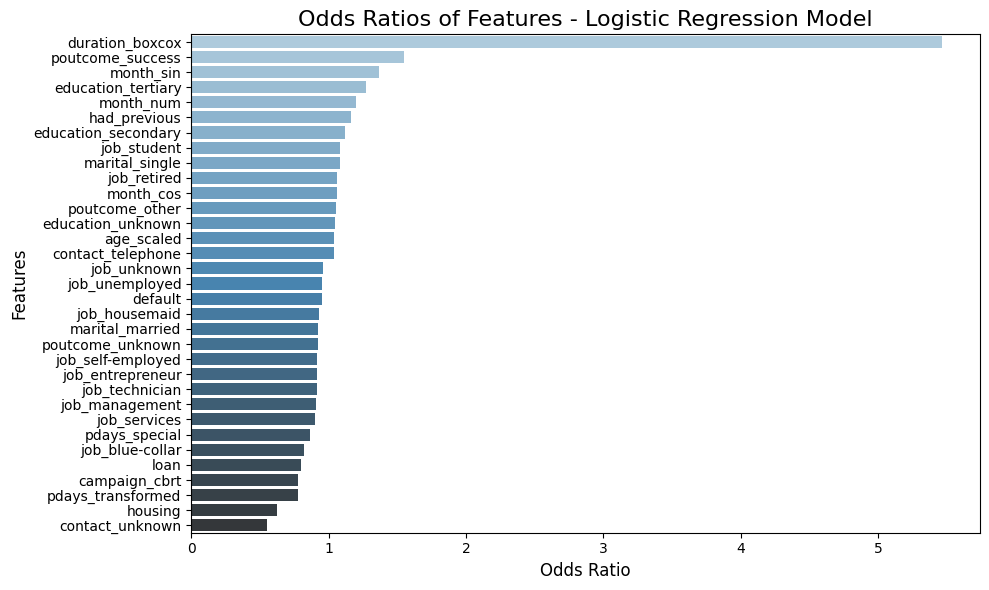

In [17]:
# Sort the summary DataFrame by Odds Ratio in descending order
sorted_summary = summary.sort_values(by="Odds Ratio", ascending=False)
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Odds Ratio', y='Feature', data=sorted_summary, palette='Blues_d')

# Add labels and title
plt.title('Odds Ratios of Features - Logistic Regression Model', fontsize=16)
plt.xlabel('Odds Ratio', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()

plt.savefig("plots/odds-ratios.png")
# Show plot
plt.show()

In [12]:
# Example: Save your trained model
with open('models/logistic_regression_model-skewness.pkl', 'wb') as file:
    pickle.dump(model, file)